# KNN


In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset
from assignment_2.digits_classifiers.classifiers import NaiveBayes
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

In [2]:
data = read_datasets()

2022-12-19 17:24:11.405 | INFO     | assignment_2.digits_classifiers.io:read_datasets:40 - Reading datasets


In [3]:
X, y = data

In [4]:
X, _, y, _ = train_test_split(X, y, test_size=0.97)

## Train Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [6]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

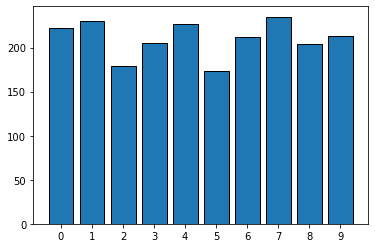

In [8]:
data.digit_distribution()

## Modelling bayes

In [9]:
from assignment_2.digits_classifiers.classifiers import BayesEstimator

be = BayesEstimator()

In [10]:
be.fit(X=X_train, y=y_train)

2022-12-19 17:24:23.926 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:121 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\0_mean
2022-12-19 17:24:23.988 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:121 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\1_mean
2022-12-19 17:24:24.020 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:121 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\2_mean
2022-12-19 17:24:24.067 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:121 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\3_mean
2022-12-19 17:24:24.160 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:121 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\4_mean
2022-12-19 17:24:24.192 | INFO     | assignme

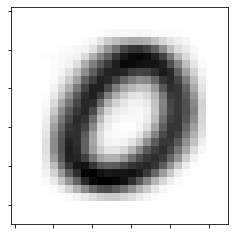

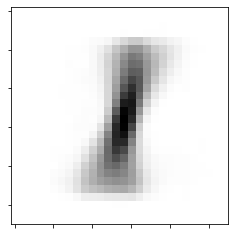

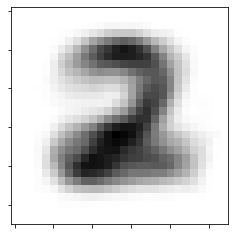

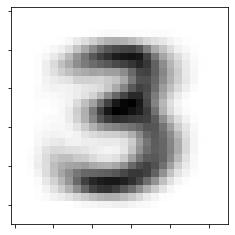

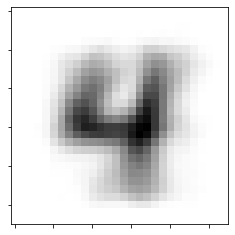

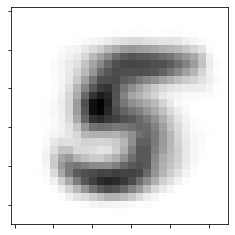

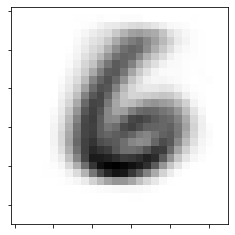

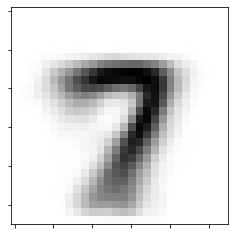

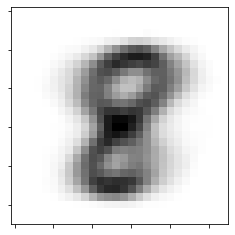

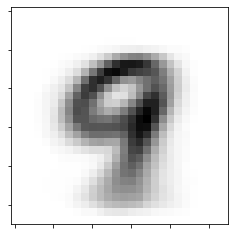

In [11]:
from assignment_2.digits_classifiers.utils import chunks, plot_digit

for i in range(10):
    pixels = [val.mean for val in be.pixels[i].values()]
    chunks_ = chunks(lst=pixels, n=28)
    plot_digit(pixels=chunks_, save=True, file_name=f"{i}_mean")

In [12]:
bc = NaiveBayes(train=train, test=test)

In [13]:
%%time
bc.train()

Wall time: 7.72 s


In [14]:
%%time
bc.predict()

2022-12-19 17:24:32.477 | INFO     | assignment_2.digits_classifiers.classifiers:predict:463 -  > 0.000%
C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\classifiers.py:347: RuntimeWarning: invalid value encountered in double_scalars
  return self.mean * (1 - self.mean) / self.var - 1
2022-12-19 17:24:39.147 | INFO     | assignment_2.digits_classifiers.classifiers:predict:463 -  > 4.762%
2022-12-19 17:24:46.709 | INFO     | assignment_2.digits_classifiers.classifiers:predict:463 -  > 9.524%
2022-12-19 17:24:54.178 | INFO     | assignment_2.digits_classifiers.classifiers:predict:463 -  > 14.286%
2022-12-19 17:25:01.850 | INFO     | assignment_2.digits_classifiers.classifiers:predict:463 -  > 19.048%
2022-12-19 17:25:09.428 | INFO     | assignment_2.digits_classifiers.classifiers:predict:463 -  > 23.810%
2022-12-19 17:25:17.038 | INFO     | assignment_2.digits_classifiers.classifiers:predict:463 -  > 28.571%
2022-12-19 17:25:24.647 | INFO     | assignment_2.d

Wall time: 2min 35s


In [15]:
bc.accuracy

0.7904761904761904

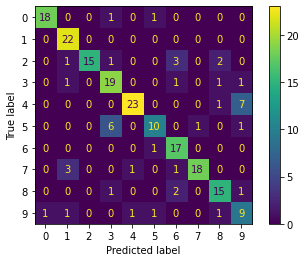

In [16]:
bc.confusion_matrix()

In [17]:
bc.estimator.pixels[0]

C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\classifiers.py:347: RuntimeWarning: invalid value encountered in double_scalars
  return self.mean * (1 - self.mean) / self.var - 1


{'pixel1': Pixel[mean: 0.0; var: 0.0],
 'pixel2': Pixel[mean: 0.0; var: 0.0],
 'pixel3': Pixel[mean: 0.0; var: 0.0],
 'pixel4': Pixel[mean: 0.0; var: 0.0],
 'pixel5': Pixel[mean: 0.0; var: 0.0],
 'pixel6': Pixel[mean: 0.0; var: 0.0],
 'pixel7': Pixel[mean: 0.0; var: 0.0],
 'pixel8': Pixel[mean: 0.0; var: 0.0],
 'pixel9': Pixel[mean: 0.0; var: 0.0],
 'pixel10': Pixel[mean: 0.0; var: 0.0],
 'pixel11': Pixel[mean: 0.0; var: 0.0],
 'pixel12': Pixel[mean: 0.0; var: 0.0],
 'pixel13': Pixel[mean: 0.0; var: 0.0],
 'pixel14': Pixel[mean: 0.0; var: 0.0],
 'pixel15': Pixel[mean: 0.0; var: 0.0],
 'pixel16': Pixel[mean: 0.0; var: 0.0],
 'pixel17': Pixel[mean: 0.0; var: 0.0],
 'pixel18': Pixel[mean: 0.0; var: 0.0],
 'pixel19': Pixel[mean: 0.0; var: 0.0],
 'pixel20': Pixel[mean: 0.0; var: 0.0],
 'pixel21': Pixel[mean: 0.0; var: 0.0],
 'pixel22': Pixel[mean: 0.0; var: 0.0],
 'pixel23': Pixel[mean: 0.0; var: 0.0],
 'pixel24': Pixel[mean: 0.0; var: 0.0],
 'pixel25': Pixel[mean: 0.0; var: 0.0],
 'pixel26